# Pynx Demo

### 9 May 2016

----

## Contents


[Using Hardware Libraries: PMod Overlay](#Using-Hardware-Libraries:-PMod-Overlay)

[Re-configure PMod peripherals and re-boot](#Re-configure-PMod-peripherals-and-re-boot)

[Plotting the I/O linearity](#Plotting-the-I/O-linearity)

[Accessing help](#Accessing-help)

[Online Documentation](#Online-Documentation)

[Exploring the target set-up](#Exploring-the-target-set-up)

----

## Using Hardware Libraries: PMod Overlay

### 1. Import hardware libraries and classes

In [2]:
"""
from pynq import Overlay
from pynq.pmods import PMOD_ADC, PMOD_DAC, PMOD_OLED
"""

from pynq import Overlay
from pynq.iop import PMOD_ADC, PMOD_DAC, PMOD_OLED

### 2. Program the ZYNQ PL

In [3]:
"""ol = Overlay('base.bit')"""

ol = Overlay('base.bit')

In [4]:
"""ol.download()"""

ol.download()

### 3. Instantiate the PMod peripherals as Python objects

In [5]:
"""
adc = PMOD_ADC(3)
dac = PMOD_DAC(1)
oled = PMOD_OLED(4)
"""

adc = PMOD_ADC(1)
dac = PMOD_DAC(2)


### 4. Write to DAC, read from ADC, write to OLED

In [6]:
"""
dac.write(0.75)
sample = adc.read()
oled.write(str(sample))
print(sample)
"""

dac.write(0.65)
sample = adc.read()
print(sample)

[0.623]


----

## Shutdon Re-configure PMod peripherals and re-boot

In [ ]:
!shutdown now

### Udate port numbers and output volatge and re-run

In [ ]:
# DAC - ADC - OLED PMod Demo
# 5 May 2016

from pynq import Overlay
from pynq.pmods import PMOD_ADC, PMOD_DAC, PMOD_OLED

# Program the ZYNQ PL
ol = Overlay('pmod.bit')
ol.download()

# Instantiate the PMod peripherals as Python objects
dac = PMOD_DAC(3)
adc = PMOD_ADC(1)
oled = PMOD_OLED(4)

# Write to DAC, read from ADC, write to OLED
dac.write(0.35)
sample = adc.read()
oled.write(str(sample))
print(sample)

----

## Plotting the I/O linearity

In [19]:
# DAC - ADC - OLED PMod Demo
# 5 May 2016

from math import ceil
from time import sleep
import numpy as np
import matplotlib.pyplot as plt

from pynq import Overlay
from pynq.iop import PMOD_ADC, PMOD_DAC

# Program the ZYNQ PL
ol = Overlay('base.bit')
ol.download()

# Instantiate the PMod peripherals as Python objects
dac = PMOD_DAC(2)
adc = PMOD_ADC(1)


# Write to DAC, read from ADC
delay = 0.0
values = np.linspace(0, 2, 20)
samples = []
for value in values:
    dac.write(value)
    sleep(delay)
    sample = adc.read()
    samples.append(sample[0])
    print('Value written: {:4.2f}\tSample read: {:4.2f}\tError: {:+4.4f}'.
          format(value, sample[0], sample[0]-value))

Value written: 0.00	Sample read: 0.00	Error: +0.0020
Value written: 0.11	Sample read: 0.10	Error: -0.0037
Value written: 0.21	Sample read: 0.21	Error: +0.0004
Value written: 0.32	Sample read: 0.31	Error: -0.0072
Value written: 0.42	Sample read: 0.41	Error: -0.0070
Value written: 0.53	Sample read: 0.50	Error: -0.0278
Value written: 0.63	Sample read: 0.62	Error: -0.0105
Value written: 0.74	Sample read: 0.71	Error: -0.0220
Value written: 0.84	Sample read: 0.81	Error: -0.0335
Value written: 0.95	Sample read: 0.93	Error: -0.0138
Value written: 1.05	Sample read: 1.03	Error: -0.0253
Value written: 1.16	Sample read: 1.12	Error: -0.0368
Value written: 1.26	Sample read: 1.21	Error: -0.0484
Value written: 1.37	Sample read: 1.31	Error: -0.0579
Value written: 1.47	Sample read: 1.43	Error: -0.0401
Value written: 1.58	Sample read: 1.53	Error: -0.0516
Value written: 1.68	Sample read: 1.62	Error: -0.0612
Value written: 1.79	Sample read: 1.72	Error: -0.0727
Value written: 1.89	Sample read: 1.81	Error: -

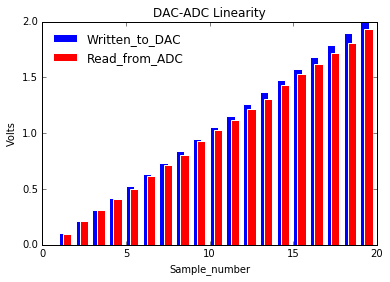

In [20]:
# Draw the DAC-ADC linearity plot in the notebook

# Show plots in notebook (rather than in separate window)
%matplotlib inline
    
X = np.arange(len(values))
plt.bar(X + 0.0, values, facecolor='blue', edgecolor='white', width=0.5, label="Written_to_DAC")
plt.bar(X + 0.25, samples, facecolor='red', edgecolor='white', width=0.5, label="Read_from_ADC")

plt.title('DAC-ADC Linearity')
plt.xlabel('Sample_number')
plt.ylabel('Volts')
plt.legend(loc='upper left', frameon=False)

plt.show()

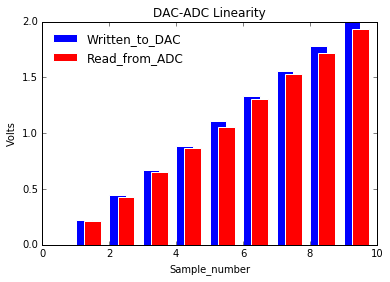

In [22]:
from math import ceil
from time import sleep
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

from pynq import Overlay
from pynq.iop import PMOD_ADC, PMOD_DAC

# Program the ZYNQ PL
ol = Overlay('base.bit')
ol.download()

# Instantiate the PMod peripherals as Python objects
dac = PMOD_DAC(2)
adc = PMOD_ADC(1)

# Draw the DAC-ADC linearity plot in the notebook

# Show plots in notebook (rather than in separate window)
%matplotlib inline

def capture_samples(nmbr_of_samples):    
    # Write to DAC, read from ADC, write to notebook
    delay = 0.0
    values = np.linspace(0, 2, nmbr_of_samples)
    samples = []
    for value in values:
        dac.write(value)
        sleep(delay)
        sample = adc.read()
        samples.append(sample[0])

    if (len(samples) == nmbr_of_samples):
        X = np.arange(nmbr_of_samples)
        plt.bar(X + 0.0, values[:nmbr_of_samples+1], facecolor='blue', edgecolor='white', width=0.5, label="Written_to_DAC")
        plt.bar(X + 0.25, samples[:nmbr_of_samples+1], facecolor='red', edgecolor='white', width=0.5, label="Read_from_ADC")

        plt.title('DAC-ADC Linearity')
        plt.xlabel('Sample_number')
        plt.ylabel('Volts')
        plt.legend(loc='upper left', frameon=False)
        plt.show()  

interact(capture_samples, nmbr_of_samples=widgets.IntSlider(min=5, max=30, step=5, value=10));

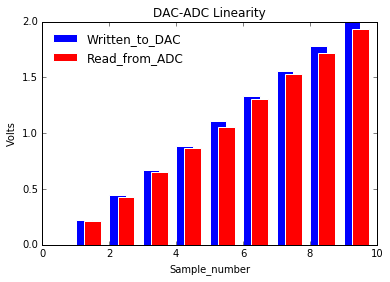

In [23]:
from math import ceil
from time import sleep
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

from pynq import Overlay
from pynq.iop import PMOD_ADC, PMOD_DAC

# Program the ZYNQ PL
ol = Overlay('base.bit')
ol.download()

# Instantiate the PMod peripherals as Python objects
dac = PMOD_DAC(2)
adc = PMOD_ADC(1)

# Draw the DAC-ADC linearity plot in the notebook

# Show plots in notebook (rather than in separate window)
%matplotlib inline

def capture_samples(nmbr_of_samples):    
    # Write to DAC, read from ADC, write to OLED
    delay = 0.0
    values = np.linspace(0, 2, nmbr_of_samples)
    samples = []
    for value in values:
        dac.write(value)
        sleep(delay)
        sample = adc.read()
        samples.append(sample[0])

    X = np.arange(nmbr_of_samples)
    plt.bar(X + 0.0, values[:nmbr_of_samples+1], facecolor='blue', edgecolor='white', width=0.5, label="Written_to_DAC")
    plt.bar(X + 0.25, samples[:nmbr_of_samples+1], facecolor='red', edgecolor='white', width=0.5, label="Read_from_ADC")

    plt.title('DAC-ADC Linearity')
    plt.xlabel('Sample_number')
    plt.ylabel('Volts')
    plt.legend(loc='upper left', frameon=False)
   
interact(capture_samples, nmbr_of_samples=widgets.IntSlider(min=5, max=30, step=5,
    value=10, continuous_update=False));

plt.show()

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


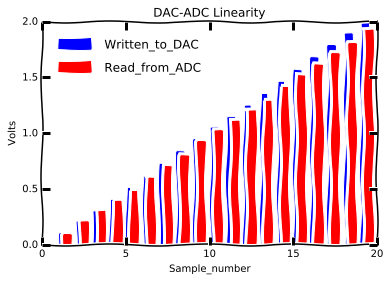

In [24]:
# Draw the DAC-ADC linearity plot in the notebook

# Show plots in notebook (rather than in separate window)
%matplotlib inline
    
# xkcd comic book style plots
with plt.xkcd():
    X = np.arange(len(values))
    plt.bar(X + 0.0, values, facecolor='blue', edgecolor='white', width=0.5, label="Written_to_DAC")
    plt.bar(X + 0.25, samples, facecolor='red', edgecolor='white', width=0.5, label="Read_from_ADC")

    plt.title('DAC-ADC Linearity')
    plt.xlabel('Sample_number')
    plt.ylabel('Volts')
    plt.legend(loc='upper left', frameon=False)

plt.show()

In [25]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbextension", line 6, in <module>
    main()
  File "/usr/local/lib/python3.4/dist-packages/jupyter_core/application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.4/dist-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/usr/local/lib/python3.4/dist-packages/notebook/nbextensions.py", line 961, in start
    super(NBExtensionApp, self).start()
  File "/usr/local/lib/python3.4/dist-packages/jupyter_core/application.py", line 256, in start
    self.subapp.start()
  File "/usr/local/lib/python3.4/dist-packages/notebook/nbextensions.py", line 869, in start
    self.toggle_nbextension_python(self.extra_args[0])
  File "/usr/local/lib/python3.4/dist-packages/notebook/nbextensions.py", line 845, in toggle_nbextension_python
    logger=self.log)
  File "/usr/local/lib/python3.4/dist-packages/note

In [26]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

x_widget = widgets.FloatSlider(min=0.0, max=10.0, step=0.05)
y_widget = widgets.FloatSlider(min=0.5, max=10.0, step=0.05, value=5.0)

def update_x_range(*args):
    x_widget.max = 2.0 * y_widget.value
y_widget.observe(update_x_range, 'value')

def printer(x, y):
    print(x, y)


interact(printer,x=x_widget, y=y_widget)

0.0 5.0


<function __main__.printer>

In [28]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

ADC_choices = ['Port_1', 'Port_2', 'Port_3', 'Port_4']

def f(ADC):
    ADC_choices = ['Port_1', 'Port_2', 'Port_3', 'Port_4']
    ADC_choices.remove(ADC)
    print(ADC_choices)
    return ADC_choices

DAC_choices = ['Port_1', 'Port_2', 'Port_3', 'Port_4']

def g(DAC):
    DAC_choices.remove(DAC)
    print(DAC_choices)
    return DAC_choices

interact(f, ADC=ADC_choices);
interact(g, DAC=DAC_choices);

['Port_2', 'Port_3', 'Port_4']


['Port_2', 'Port_3', 'Port_4']

In [29]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

x_widget = widgets.FloatSlider(min=0.0, max=10.0, step=0.05)
y_widget = widgets.FloatSlider(min=0.5, max=10.0, step=0.05, value=5.0)

def update_x_range(*args):
    x_widget.max = 2.0 * y_widget.value

y_widget.observe(update_x_range, 'value')

display(x_widget)
display(y_widget)

In [4]:
from ipywidgets import widgets
from IPython.display import display

from collections import OrderedDict

     
values = list(range(1,5))
keys = ['Port Number {}'.format(val) for val in values]
ports_dict = OrderedDict(zip(keys,values))

adc_ports = widgets.Dropdown(options=ports_dict, description='ADC: ')
display(adc_ports)
dac_ports = widgets.Dropdown(options=ports_dict, description='DAC: ')
display(dac_ports)



In [1]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [46]:
from ipywidgets import widgets
from IPython.display import display

from collections import OrderedDict

     
values = list(range(5))
key_0 = 'Unassigned'
keys = ['PMod Port Number {}'.format(val) for val in values[1:]]
keys.insert(0, key_0)
ports_dict = OrderedDict(zip(keys, values))

"""
dac_values = list(range(2,5))
dac_keys = ['PMod Port Number {}'.format(val) for val in dac_values]
dac_ports_dict = OrderedDict(zip(dac_keys, dac_values))

oled_values = list(range(3,5))
oled_keys = ['PMod Port Number {}'.format(val) for val in oled_values]
oled_ports_dict = OrderedDict(zip(oled_keys, oled_values))
"""

adc_ports = widgets.Dropdown(options= ports_dict, description='adc: ')
display(adc_ports)

def update_available_ports(*args):
    for i in args:
        ports_dict.pop('PMod Port Number {}'.format(i['new']))
        print(ports_dict)
        display(dac_ports)

adc_ports.observe(update_available_ports, 'value')

dac_ports = widgets.Dropdown(options= ports_dict, description='dac: ')
display(dac_ports)

OrderedDict([('Unassigned', 0), ('PMod Port Number 1', 1), ('PMod Port Number 3', 3), ('PMod Port Number 4', 4)])


In [36]:
for key, value in ports_dict:
    if value == 2:
        ports_dict.popitem[key]






ValueError: too many values to unpack (expected 2)

In [8]:
help(widgets.Dropdown)


Help on class Dropdown in module ipywidgets.widgets.widget_selection:

class Dropdown(_Selection)
 |  Allows you to select a single item from a dropdown.
 |  
 |  Method resolution order:
 |      Dropdown
 |      _Selection
 |      ipywidgets.widgets.domwidget.DOMWidget
 |      ipywidgets.widgets.widget.Widget
 |      traitlets.config.configurable.LoggingConfigurable
 |      traitlets.config.configurable.Configurable
 |      traitlets.traitlets.HasTraits
 |      traitlets.traitlets._NewBase
 |      traitlets.traitlets.HasDescriptors
 |      traitlets.traitlets._NewBase
 |      builtins.object
 |  
 |  Data descriptors defined here:
 |  
 |  button_style
 |      An enum of strings where the case should be ignored.
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from _Selection:
 |  
 |  __init__(self, *args, **kwargs)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from _

----


## Accessing help

In [ ]:
help(PMOD_OLED)

In [ ]:
oled.clear()

In [ ]:
help(plt.bar)

## PYNQ Documentation

[Link to PYNQ docs](http://pynq_pl:9090/files/docs/1_pynq.html)

### References

* [Matplotlib Gallery](http://matplotlib.org/gallery.html)

----

## Exploring the target set-up

### Verify that we are running on the Zynq's ARM A9 CPUs ...

In [ ]:
!cat /proc/cpuinfo

### Check CPU speed ...

In [ ]:
!lscpu | grep 'max MHz'

### Verify our device's network status ...¶

In [ ]:
!ifconfig eth0

### Confirm local hostname

In [ ]:
!hostname

### Verify Linux version ...

In [ ]:
!cat /etc/os-release | grep VERSION

----

### Confirm Python version, platform and path settings

In [ ]:
import sys

print('\nPython Version:\n {} \n\nPython Platform:\n{}\n'.format(sys.version, sys.platform))

print ('Python path settings:')
for path_entry in sys.path:
    print(path_entry)

In [ ]:
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"

In [ ]:
!pip list
